In [3]:
import pandas as pd
import re

from nltk.tokenize import word_tokenize

import nltk
nltk.download('punkt')
from nltk.corpus import stopwords
nltk.download('stopwords')
from nltk.stem import WordNetLemmatizer
nltk.download('wordnet')
from nltk.sentiment.vader import SentimentIntensityAnalyzer
nltk.download('vader_lexicon')

from emot.emo_unicode import UNICODE_EMOJI
import string

[nltk_data] Downloading package punkt to /home/jovyan/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /home/jovyan/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /home/jovyan/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package vader_lexicon to
[nltk_data]     /home/jovyan/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


In [27]:
#Read data
twitter_data=pd.read_csv("tweets_johnwick4.csv")
twitter_data.date=pd.to_datetime(twitter_data.date)

## Removing unwanted tweets

In [28]:
twitter_data[twitter_data.tweet.str.contains('download|Download| free | Online ')].tweet.head()

9      OK so I saw #JohnWick and here are my spoiler ...
159    Install this app, Watch and download "John Wic...
703                 Abeg John Wick dey for download now?
942    @mingorubies @Dponton93 @mxlivevictor @DEADLIN...
961    @FoxNews I Watched John Wick Chapter 4 for fre...
Name: tweet, dtype: object

In [29]:
twitter_data.drop(twitter_data[twitter_data.tweet.str.contains('download|Download| free | Online ')].tweet.index,axis=0,inplace=True)

In [30]:
twitter_data

,id,date,tweet,location,retweets,likes,views,media
0,1640141525714718720,2023-03-26 23:59:46+00:00,Watching John Wick 4 with @heyval2 https://t.c...,"Louisville, KY",1,1,65.0,[Gif(thumbnailUrl='https://pbs.twimg.com/tweet...
1,1640141521176461315,2023-03-26 23:59:45+00:00,@iFireMonkey So since John wick coming out is ...,Space station,0,0,833.0,NaN
2,1640141517867171842,2023-03-26 23:59:44+00:00,@MissP_MaizedOut John Wick 4,"Cleveland, OH",0,0,24.0,NaN
3,1640141517762224131,2023-03-26 23:59:44+00:00,@metaplexmovies Imagine what Stahelski and Lei...,Italy,0,1,998.0,NaN
4,1640141500624543746,2023-03-26 23:59:40+00:00,@stuwhomst giggling kicking my feet wveheheh,gee sheher20 aus,0,1,25.0,NaN
...,...,...,...,...,...,...,...,...
47516,1639416848935534593,2023-03-25 00:00:10+00:00,I John Wick 😎 https://t.co/W6n17cjnJN,"Santiago, Chile",1,2,25.0,[Photo(previewUrl='https://pbs.twimg.com/media...
47517,1639416848587321344,2023-03-25 00:00:10+00:00,John wick 4 is that movie!!! Oooh man!!! Someb...,south haven mi,0,0,39.0,NaN
47518,1639416833483632643,2023-03-25 00:00:06+00:00,@UpIsNotJump It was great to see you in John W...,NaN,0,0,37.0,[Photo(previewUrl='https://pbs.twimg.com/media...
47519,1639416831210319873,2023-03-25 00:00:06+00:00,NO WAY BACK! 'JOHN WICK 4' BLASTS ON TO UK CIN...,England,0,0,31.0,NaN


## Extracting hashtags

In [31]:

def extract_hashtag(tweet):
    tweet=tweet.lower()
    #\w for word character and \W for non-word character; \d for digit and \D or non-digit.
    hashtags=re.findall("#[\w|\d]+",tweet)
    return ' '.join(hashtags)

In [32]:
twitter_data['hashtag']=twitter_data['tweet'].apply(extract_hashtag)

In [33]:
twitter_data.head(6)

,id,date,tweet,location,retweets,likes,views,media,hashtag
0,1640141525714718720,2023-03-26 23:59:46+00:00,Watching John Wick 4 with @heyval2 https://t.c...,"Louisville, KY",1,1,65.0,[Gif(thumbnailUrl='https://pbs.twimg.com/tweet...,
1,1640141521176461315,2023-03-26 23:59:45+00:00,@iFireMonkey So since John wick coming out is ...,Space station,0,0,833.0,NaN,
2,1640141517867171842,2023-03-26 23:59:44+00:00,@MissP_MaizedOut John Wick 4,"Cleveland, OH",0,0,24.0,NaN,
3,1640141517762224131,2023-03-26 23:59:44+00:00,@metaplexmovies Imagine what Stahelski and Lei...,Italy,0,1,998.0,NaN,
4,1640141500624543746,2023-03-26 23:59:40+00:00,@stuwhomst giggling kicking my feet wveheheh,gee sheher20 aus,0,1,25.0,NaN,
5,1640141498996932608,2023-03-26 23:59:40+00:00,Thoughts on John Wick Chapter 4? https://t.co/...,NaN,0,0,41.0,[Gif(thumbnailUrl='https://pbs.twimg.com/tweet...,


In [34]:
hashtag_list=twitter_data.query("hashtag != ''").hashtag.str.split(" ").to_list()
print('hashtag_list',hashtag_list[:3])

seperated_hashtag_list=[]
for tags in hashtag_list:
    seperated_hashtag_list.extend(tags)

print('seperated_hashtag_list',seperated_hashtag_list[:5])

hashtag_data=pd.DataFrame({'hashtag':seperated_hashtag_list})


final_hashtag_data=hashtag_data.groupby('hashtag')['hashtag'].agg(count=('count')).sort_values('count',ascending=False).reset_index()
final_hashtag_data

final_hashtag_data['Percent']= 100 * final_hashtag_data['count'] / final_hashtag_data['count'].sum()

hashtag_list [['#johnwick'], ['#jw4'], ['#clivill']]
seperated_hashtag_list ['#johnwick', '#jw4', '#clivill', '#johnwick4', '#johnwick2']


In [35]:
final_hashtag_data

,hashtag,count,Percent
0,#johnwick4,1709,19.549302
1,#johnwick,948,10.844200
2,#johnwickchapter4,514,5.879661
3,#keanureeves,337,3.854953
4,#movies,102,1.166781
...,...,...,...
2225,#legend,1,0.011439
2226,#lectured,1,0.011439
2227,#lebanese,1,0.011439
2228,#lcu,1,0.011439


## Top 10 most used #hashtags

Text(0.5, 1.0, 'Top 10 most used #hashtags')

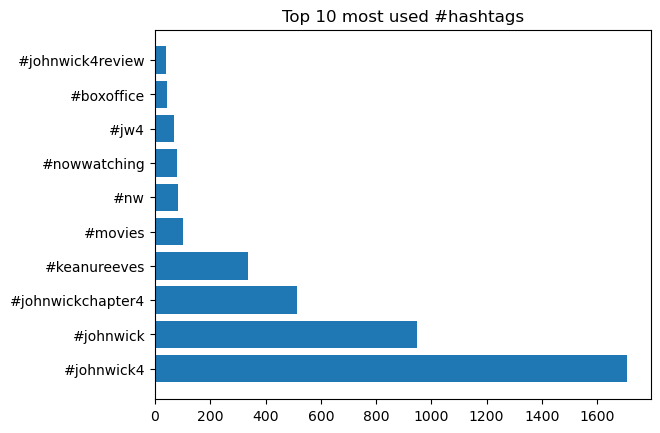

In [36]:
from matplotlib import pyplot as plt

plt.barh(final_hashtag_data.hashtag.head(10),final_hashtag_data['count'].head(10),)
plt.title("Top 10 most used #hashtags")

### Total unique hashtags used

In [37]:
print("Total unique hashtags : ",len(final_hashtag_data))

Total unique hashtags :  2230


## Counting movie characters

In [38]:
characters=['Winston','John Wick','Marchese Gramont','Bowery King','Shimazu','Charon','Killa','Caine','Agent','Thug','Katia','Chidi',
            'Tracker','Akira']
real_characters=['Ian McShane','Keanu Reeves','Bill Skarsgård','Laurence Fishburne','Hiroyuki Sanada','Lance Reddick','Scott Adkins',
                 'Donnie Yen','Ryan Castle','Michael Simmons','Natalia Tena','Marko Zaror','Shamier Anderson','Rina Sawayama']

# Converting to lower case
for i in range(len(characters)):
    characters[i]=characters[i].lower()
    
for i in range(len(real_characters)):
    real_characters[i]=real_characters[i].lower()

#seperating names and surnames
sep_real_characters=[]
for i in range(len(real_characters)):
    sep_real_characters.extend(real_characters[i].split(' '))
    
sep_characters=[]
for i in range(len(characters)):
    sep_characters.extend(characters[i].split(' '))

print('Seperated real characters',sep_real_characters[:4])
print('Seperated movie characters',sep_characters[:4])

Seperated real characters ['ian', 'mcshane', 'keanu', 'reeves']
Seperated movie characters ['winston', 'john', 'wick', 'marchese']


In [17]:
def get_characters_count(twitter_data,characters):
    count=[]
    #modified_chars_list=[ '|'.join( name.split() + [name] ) if len(name.split()) >1 else name for name in characters] 
    modified_chars_list=[ '|'.join( name.split() ) for name in characters ] 
    for name in modified_chars_list:
        count.append( twitter_data.tweet.str.lower().str.contains(name).sum() )
    return count

In [18]:
movie_characters_data=pd.DataFrame({'names':characters,'count':get_characters_count(twitter_data,characters)})
movie_characters_data=movie_characters_data.sort_values('count',ascending=False).reset_index(drop=True)
movie_characters_data['percent']=100 * movie_characters_data['count']/movie_characters_data['count'].sum()
movie_characters_data

,names,count,percent
0,john wick,44480,92.450948
1,bowery king,3097,6.437064
2,caine,197,0.409461
3,winston,80,0.166279
4,akira,73,0.151729
5,killa,43,0.089375
6,agent,37,0.076904
7,charon,35,0.072747
8,tracker,25,0.051962
9,shimazu,21,0.043648


In [19]:
real_characters_data=pd.DataFrame({'names':real_characters,'count':get_characters_count(twitter_data,real_characters)})
real_characters_data=real_characters_data.sort_values('count',ascending=False).reset_index(drop=True)
real_characters_data['percent']=100 * real_characters_data['count']/real_characters_data['count'].sum()
real_characters_data

,names,count,percent
0,keanu reeves,1931,38.674144
1,ian mcshane,772,15.461646
2,rina sawayama,611,12.237132
3,donnie yen,542,10.855197
4,bill skarsgård,321,6.429001
5,lance reddick,266,5.327458
6,scott adkins,204,4.085720
7,ryan castle,87,1.742439
8,shamier anderson,70,1.401963
9,laurence fishburne,57,1.141598


## Combining movie characters and real characters

In [56]:
for char,real_char in zip(characters,real_characters):
    combined_name='|'.join( ['|'.join(char.split()) , '|'.join(real_char.split()) ] )
    twitter_data[char]= twitter_data.tweet.str.lower().str.contains(combined_name).astype('int')
    print(combined_name ,' :: ',twitter_data.tweet.str.lower().str.contains(combined_name).sum())

winston|ian|mcshane  ::  844
john|wick|keanu|reeves  ::  44489
marchese|gramont|bill|skarsgård  ::  332
bowery|king|laurence|fishburne  ::  3144
shimazu|hiroyuki|sanada  ::  77
charon|lance|reddick  ::  287
killa|scott|adkins  ::  236
caine|donnie|yen  ::  708
agent|ryan|castle  ::  123
thug|michael|simmons  ::  62
katia|natalia|tena  ::  10
chidi|marko|zaror  ::  14
tracker|shamier|anderson  ::  88
akira|rina|sawayama  ::  656


## Processing Tweets

In [94]:

stop_words = stopwords.words('english')+["'s",'’','’', '...', '..', '.', '.....', '....','ve','got',"n't"]
alphabets=[ alpha for alpha in string.ascii_lowercase ] #a,b,c,d,...,z
stop_words=stop_words + alphabets

emojis = list( UNICODE_EMOJI.keys() )

In [95]:

def process_tweets(tweet):
    tweet=tweet.lower()
    
    #removeing urls
    tweet=re.sub(r"http\S+|www\S+|https\S+",'',tweet)

    #removing @ and # references
    tweet=re.sub(r"\@\w+|\#\w+|",'',tweet)

    #removing stop words and emojis
    tweet_tokens = word_tokenize(tweet)  # convert string to tokens
    filtered_words = [w for w in tweet_tokens if w not in stop_words]
    
    #filtering emojis 
    #below code handles cases where there is just one space-one_emoji-space 
    #or space-multiple_emoji-space or text-emoji-space or space-emoji-text
    emoji_filtered_words=[]
    for w in filtered_words:
        if len(w)==1 :
            if w not in emojis:
                emoji_filtered_words.append(w)
        else:

            if w[0] in emojis or w[-1] in emojis:
                str_without_emoji=''
                if w[0] in emojis:
                    for i in range(len(w)):
                        if w[i] not in emojis:
                            str_without_emoji=w[i:]
                            break

                elif w[-1] in emojis:
                    for i in reversed(range(len(w))):
                        if w[i] not in emojis:
                            str_without_emoji=w[:i+1]
                            break

                emoji_filtered_words.append( str_without_emoji )
            else:
                emoji_filtered_words.append(w)

    #remove punchuations
    unpunctuated_words = [w for w in emoji_filtered_words if w not in string.punctuation]
    lemmatizer = WordNetLemmatizer() # instatiate an object WordNetLemmatizer Class
    lemma_words = [lemmatizer.lemmatize(w) for w in unpunctuated_words]
    return " ".join(lemma_words)

In [96]:
twitter_data['processed_tweets']=twitter_data.tweet.apply(process_tweets)
twitter_data

,id,date,tweet,location,retweets,likes,views,media,hashtag,winston,...,charon,killa,caine,agent,thug,katia,chidi,tracker,akira,processed_tweets
0,1640141525714718720,2023-03-26 23:59:46+00:00,Watching John Wick 4 with @heyval2 https://t.c...,"Louisville, KY",1,1,65.0,[Gif(thumbnailUrl='https://pbs.twimg.com/tweet...,,0,...,0,0,0,0,0,0,0,0,0,watching john wick 4
1,1640141521176461315,2023-03-26 23:59:45+00:00,@iFireMonkey So since John wick coming out is ...,Space station,0,0,833.0,NaN,,0,...,0,0,0,0,0,0,0,0,0,since john wick coming anything thing file ski...
2,1640141517867171842,2023-03-26 23:59:44+00:00,@MissP_MaizedOut John Wick 4,"Cleveland, OH",0,0,24.0,NaN,,0,...,0,0,0,0,0,0,0,0,0,john wick 4
3,1640141517762224131,2023-03-26 23:59:44+00:00,@metaplexmovies Imagine what Stahelski and Lei...,Italy,0,1,998.0,NaN,,0,...,0,0,0,0,0,0,0,0,0,imagine stahelski leitch would achieve protago...
4,1640141500624543746,2023-03-26 23:59:40+00:00,@stuwhomst giggling kicking my feet wveheheh,gee sheher20 aus,0,1,25.0,NaN,,0,...,0,0,0,0,0,0,0,0,0,giggling kicking foot wveheheh
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
47516,1639416848935534593,2023-03-25 00:00:10+00:00,I John Wick 😎 https://t.co/W6n17cjnJN,"Santiago, Chile",1,2,25.0,[Photo(previewUrl='https://pbs.twimg.com/media...,,0,...,0,0,0,0,0,0,0,0,0,john wick
47517,1639416848587321344,2023-03-25 00:00:10+00:00,John wick 4 is that movie!!! Oooh man!!! Someb...,south haven mi,0,0,39.0,NaN,,0,...,0,0,0,0,0,0,0,0,0,john wick 4 movie oooh man somebody hand gun k...
47518,1639416833483632643,2023-03-25 00:00:06+00:00,@UpIsNotJump It was great to see you in John W...,NaN,0,0,37.0,[Photo(previewUrl='https://pbs.twimg.com/media...,,0,...,0,0,0,0,0,0,0,0,0,great see john wick chapter 4
47519,1639416831210319873,2023-03-25 00:00:06+00:00,NO WAY BACK! 'JOHN WICK 4' BLASTS ON TO UK CIN...,England,0,0,31.0,NaN,,0,...,0,0,0,0,0,0,0,0,0,way back 'john wick 4 blast uk cinema


## Top 10 most used words

In [23]:
words=[]

for word_list in twitter_data['processed_tweets'].str.split(' ').to_list() :
    words.extend(word_list) 
    
words_data=pd.DataFrame({'words':words})
top_10_words_data=words_data.value_counts().head(10).reset_index()
top_10_words_data.columns=['words','count']
top_10_words_data

,words,count
0,wick,46730
1,john,46398
2,4,19969
3,movie,8334
4,chapter,6037
5,see,4433
6,action,3312
7,like,3118
8,one,2990
9,good,2945


## Sentiment Analysis using VADER Model

In [24]:
sia=SentimentIntensityAnalyzer()

def sia_polarity(tweet,sia):
    if sia.polarity_scores(tweet)['compound'] >=0:
        return 'positive'  #positive
    else:
        return 'negative'  #negative

In [25]:
twitter_data['sentiment']=twitter_data.tweet.apply(sia_polarity,args=[sia])

In [26]:
sentiment_data=twitter_data.sentiment.value_counts().reset_index()
sentiment_data['percent']=100 * sentiment_data['sentiment']/sentiment_data['sentiment'].sum()
sentiment_data

,index,sentiment,percent
0,positive,37891,80.094276
1,negative,9417,19.905724


Text(0.5, 1.0, 'Twitter Sentiments')

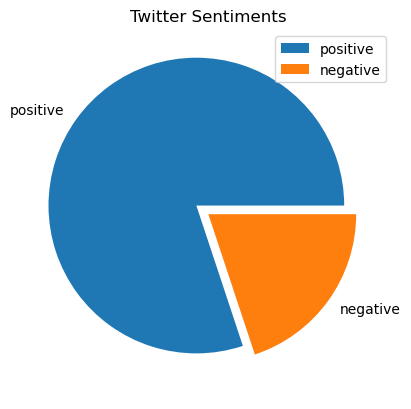

In [27]:
plt.pie(sentiment_data.percent,labels=sentiment_data['index'].to_list(),explode=[0.1,0])
plt.legend()
plt.title("Twitter Sentiments")

## Getting user country
Below code runs very slow as it uses api, i have saved location to country mappings in location_to_country.json for direct use.

In [28]:
twitter_data.location.value_counts()

Los Angeles, CA         517
United States           438
Chicago, IL             275
Atlanta, GA             244
gee sheher20 aus        238
                       ... 
The v o i d               1
Kajang, selangor          1
british columbia, 🇨🇦      1
Yo soy pendejo            1
south haven mi            1
Name: location, Length: 13654, dtype: int64

In [29]:
from geopy.geocoders import Nominatim

# create a geolocator object with a custom user agent
geolocator = Nominatim(user_agent="analysis")

def get_country(user_location,geolocator):
    # get the location's country
    location = geolocator.geocode(user_location, exactly_one=True,timeout=20)
    if location:
        address = location.address.split(', ')
        country = address[-1].strip()
        return country
    else:
        return "Unknown"



In [32]:


#Removing location with only digits, ex: '546', '8455'
def replace_location_with_only_digits(loc):
    match=re.match("[0-9]+",loc)
    if match:
        span=match.span()
        if span[0]==0 and span[1]==len(loc):
            return 'Unknown'
    else:
        return loc

In [33]:
#Replace nan by unknown
twitter_data.location.fillna('Unknown',inplace=True)
twitter_data['location']=twitter_data.location.apply(replace_location_with_only_digits)
twitter_data.reset_index(drop=True,inplace=True)

In [34]:
twitter_data.location

0                        Louisville, KY
1                         Space station
2                         Cleveland, OH
3                                 Italy
4                      gee sheher20 aus
                      ...              
47303                   Santiago, Chile
47304                    south haven mi
47305                           Unknown
47306                           England
47307    Atlanta, GA  Lawrenceville, GA
Name: location, Length: 47308, dtype: object

In [35]:
#twitter_data['country']='0'

In [36]:
from tqdm import tqdm

def get_country_dict(twitter_data,geolocator):
    unique_locations=twitter_data.location.unique().tolist()
    unique_locations.remove('Unknown')

    location_to_country={}
    location_to_country['Unknown']='Unknown'

    for loc in tqdm(unique_locations,total=len(unique_locations)):
        location_to_country[loc]=get_country(loc,geolocator)
        
    return  location_to_country
    

In [37]:
location_to_country = get_country_dict(twitter_data,geolocator)

100%|██████████| 13087/13087 [1:54:28<00:00,  1.91it/s]  


In [38]:
import json

#Save location_to_country dict in json format
with open('location_to_country.json', 'w') as fp:
    json.dump(location_to_country, fp,indent=4)

In [39]:
twitter_data['country']=twitter_data.location.map(location_to_country)

## Top 10 countries with most tweets

In [40]:
twitter_data.country.value_counts().head(10)

Unknown           22463
United States     13077
United Kingdom     1987
India              1104
Canada              982
Italia              829
Nigeria             517
Australia           412
Philippines         356
France              337
Name: country, dtype: int64

## Top 10 most liked tweets

In [41]:
twitter_data.sort_values('likes',ascending=False)[['tweet','likes']].head(10)

,tweet,likes
10173,scream 6 - highest opening for the series\n\nc...,76932
5213,Me in the middle of the club while John Wick k...,72296
30507,Keanu Reeves did 90% of his own stunts for ‘JO...,60702
10266,‘JOHN WICK 4’ earns $137.5M in the film’s worl...,45966
5869,"The ‘John Wick’ spin-off film ‘BALLERINA’, sta...",38378
9284,The best at what he does. #JohnWick4 is the #1...,31371
12430,john wick skin and tilted towers was the close...,29441
5451,The ‘John Wick’ prequel series ‘THE CONTINENTA...,27792
33784,‘JOHN WICK 4’ is making new records for the fr...,23799
6966,‘JOHN WICK 4’ is the #1 film worldwide this we...,21692


## Top 10 most retweeted tweets

In [42]:
twitter_data.sort_values('retweets',ascending=False)[['tweet','retweets']].head(10)

,tweet,retweets
5213,Me in the middle of the club while John Wick k...,11879
30507,Keanu Reeves did 90% of his own stunts for ‘JO...,4176
9284,The best at what he does. #JohnWick4 is the #1...,4115
10173,scream 6 - highest opening for the series\n\nc...,4107
12430,john wick skin and tilted towers was the close...,4006
5869,"The ‘John Wick’ spin-off film ‘BALLERINA’, sta...",2997
10266,‘JOHN WICK 4’ earns $137.5M in the film’s worl...,2862
5451,The ‘John Wick’ prequel series ‘THE CONTINENTA...,2764
33784,‘JOHN WICK 4’ is making new records for the fr...,2530
41975,John Wick 4 club dancers while John Wick kills...,1809


## Top 10 most viewd tweets

In [43]:
twitter_data.sort_values('views',ascending=False)[['tweet','views']].head(10)

,tweet,views
10361,‘JOHN WICK 4’ earns $73.5M in the film’s domes...,6766440.0
10173,scream 6 - highest opening for the series\n\nc...,5872305.0
30507,Keanu Reeves did 90% of his own stunts for ‘JO...,4160783.0
10266,‘JOHN WICK 4’ earns $137.5M in the film’s worl...,4106303.0
5213,Me in the middle of the club while John Wick k...,3019168.0
5869,"The ‘John Wick’ spin-off film ‘BALLERINA’, sta...",2904327.0
5451,The ‘John Wick’ prequel series ‘THE CONTINENTA...,2081499.0
12430,john wick skin and tilted towers was the close...,1829505.0
8418,I can’t express how disappointed I am in John ...,1714043.0
33784,‘JOHN WICK 4’ is making new records for the fr...,1207076.0


In [44]:
twitter_data.drop('media',axis=1,inplace=True)
twitter_data.to_csv("Processed_twitter_data.csv",index=False)